In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("2000.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2000,17523,352,28,3549
1,2000,17484,221,28,3536
2,2000,17806,60,13,3562
3,2000,17550,117,21,3538
4,2000,17651,127,31,3553
...,...,...,...,...,...
1842,2000,17329,21,34,3557
1843,2000,17259,424,16,3567
1844,2000,17671,50,16,3542
1845,2000,17607,405,39,3507


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1847, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1847 non-null   int64
 1   Maximum length (m))  1847 non-null   int64
 2   Recession(m),        1847 non-null   int64
 3   Rate/yr(m)           1847 non-null   int64
 4   Snout altitude (m)   1847 non-null   int64
dtypes: int64(5)
memory usage: 72.3 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1847


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2000,17523,352,28,3549
1,2000,17484,221,28,3536
2,2000,17806,60,13,3562
3,2000,17550,117,21,3538
4,2000,17651,127,31,3553


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0369,-0.0122,-0.0422
"Recession(m),",NaN,-0.0369,1.0000,0.0119,0.0130
Rate/yr(m),NaN,-0.0122,0.0119,1.0000,-0.0156
Snout altitude (m),NaN,-0.0422,0.0130,-0.0156,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)            -0.0122
Recession(m),         -0.0369
Snout altitude (m)    -0.0422
Year                      NaN
Name: Maximum length (m)), dtype: float64

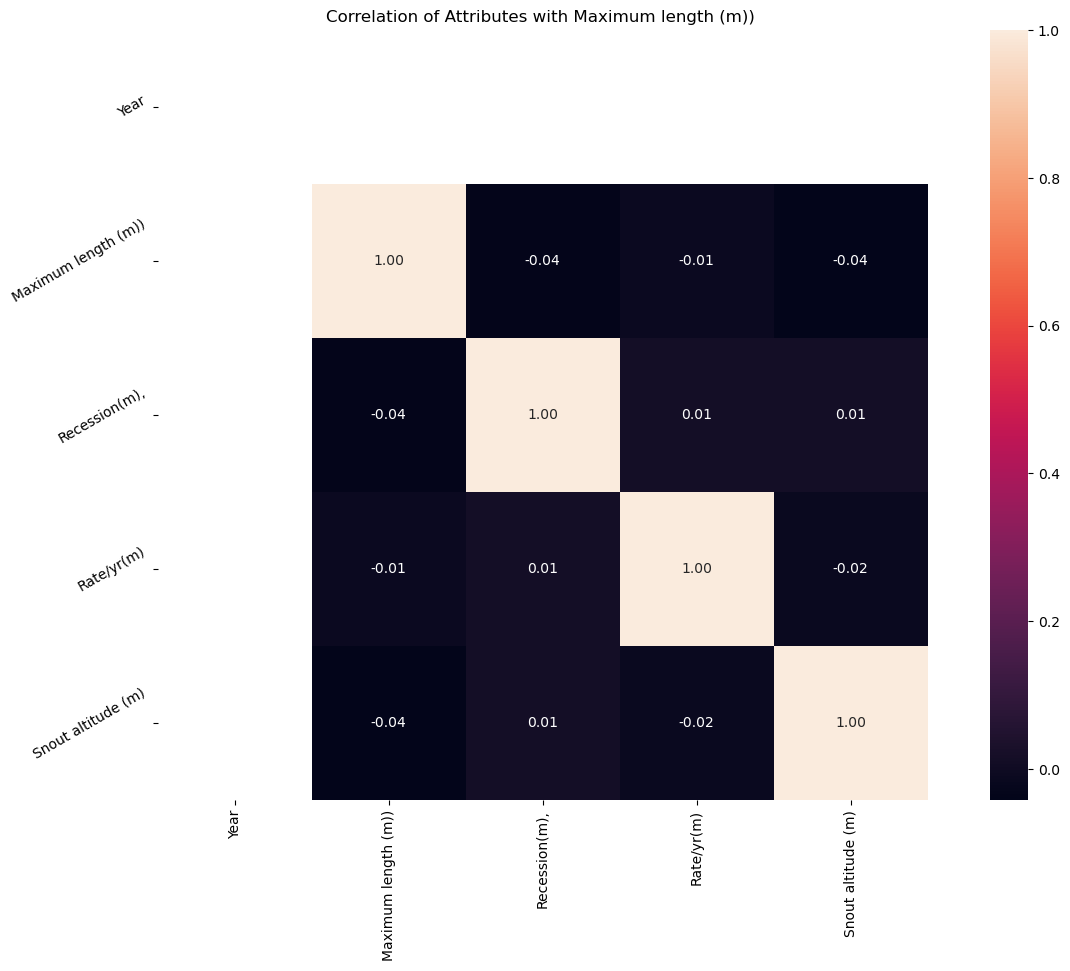

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,847.0000","1,847.0000","1,847.0000","1,847.0000","1,847.0000"
mean,"2,000.0000","17,547.6654",220.6773,27.4700,"3,531.8517"
std,0.0000,302.6303,126.7790,8.6824,20.8170
min,"2,000.0000","17,036.0000",0.0000,13.0000,"3,496.0000"
25%,"2,000.0000","17,285.0000",111.0000,20.0000,"3,514.0000"
50%,"2,000.0000","17,539.0000",220.0000,28.0000,"3,532.0000"
75%,"2,000.0000","17,814.0000",329.0000,35.0000,"3,550.0000"
max,"2,000.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2000   1.0000
Name: Year, dtype: float64

246   0.0065
116   0.0065
57    0.0060
269   0.0060
33    0.0054
       ...  
99    0.0005
5     0.0005
153   0.0005
313   0.0005
351   0.0005
Name: Recession(m),, Length: 430, dtype: float64

33   0.0395
16   0.0384
25   0.0384
31   0.0379
18   0.0379
39   0.0379
22   0.0374
38   0.0363
34   0.0357
42   0.0357
30   0.0347
13   0.0341
20   0.0330
28   0.0330
32   0.0330
41   0.0330
21   0.0330
24   0.0325
14   0.0319
19   0.0319
40   0.0319
17   0.0319
26   0.0314
15   0.0303
29   0.0298
23   0.0287
35   0.0287
27   0.0287
37   0.0271
36   0.0260
Name: Rate/yr(m), dtype: float64

3502   0.0211
3564   0.0206
3557   0.0195
3518   0.0189
3510   0.0184
        ...  
3498   0.0097
3513   0.0097
3555   0.0087
3537   0.0076
3496   0.0016
Name: Snout altitude (m), Length: 72, dtype: float64



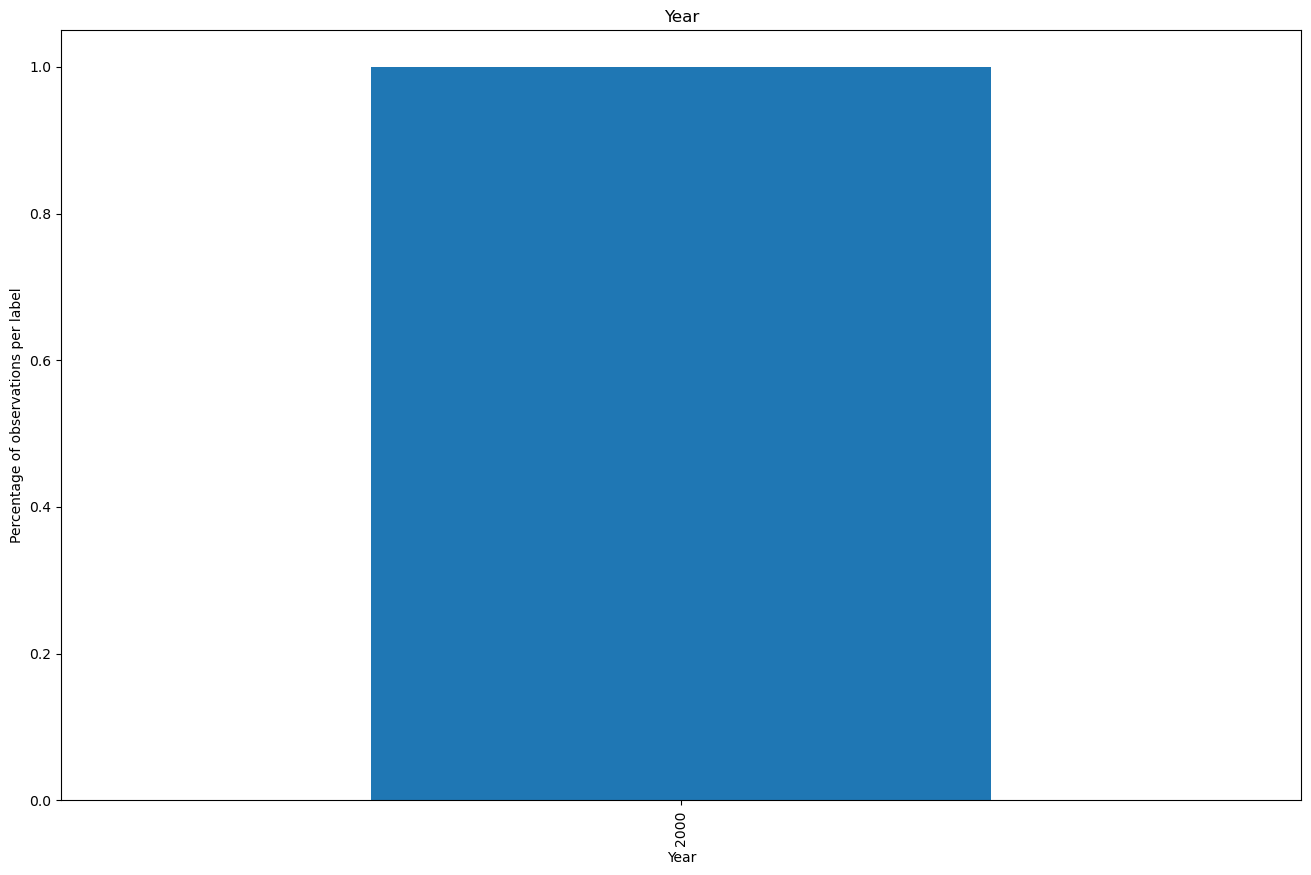

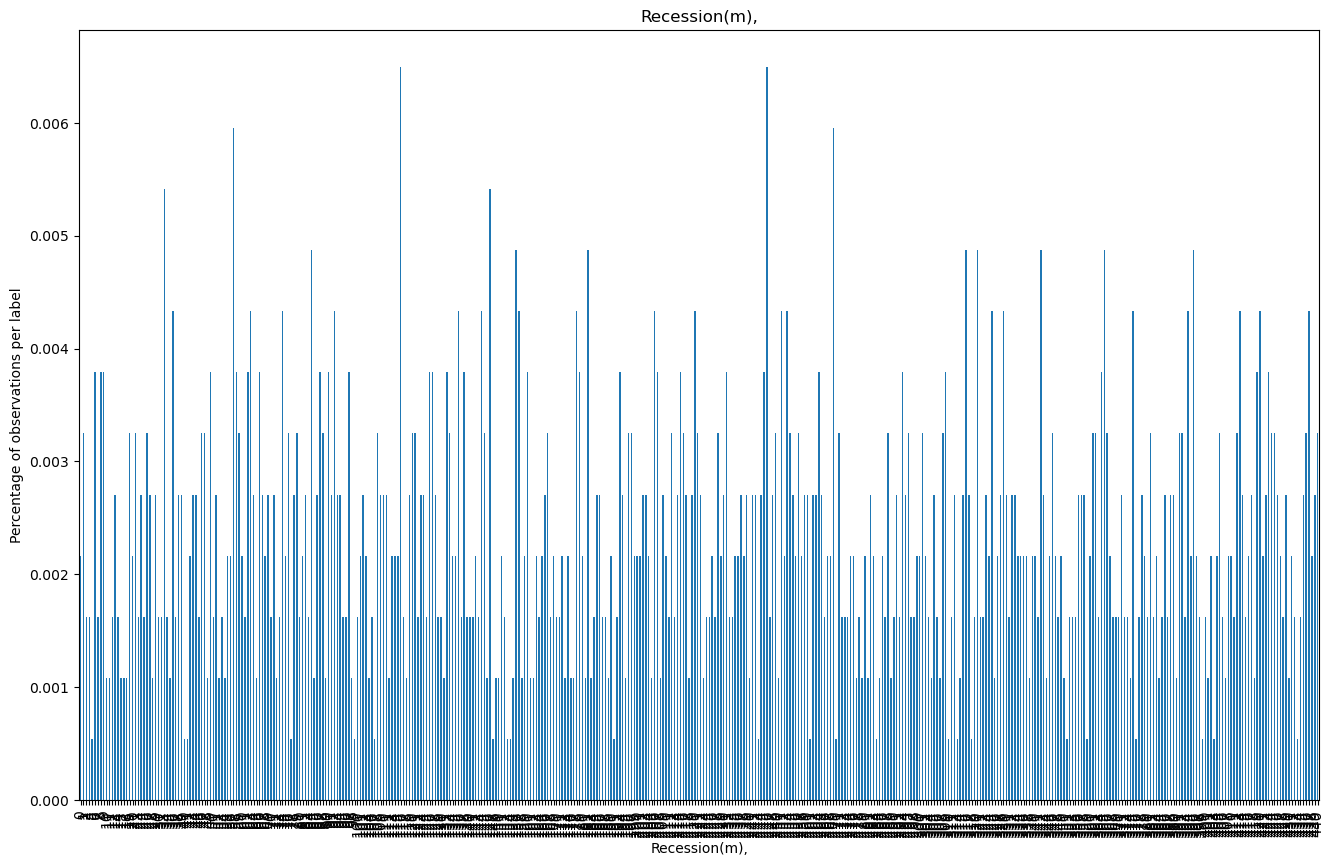

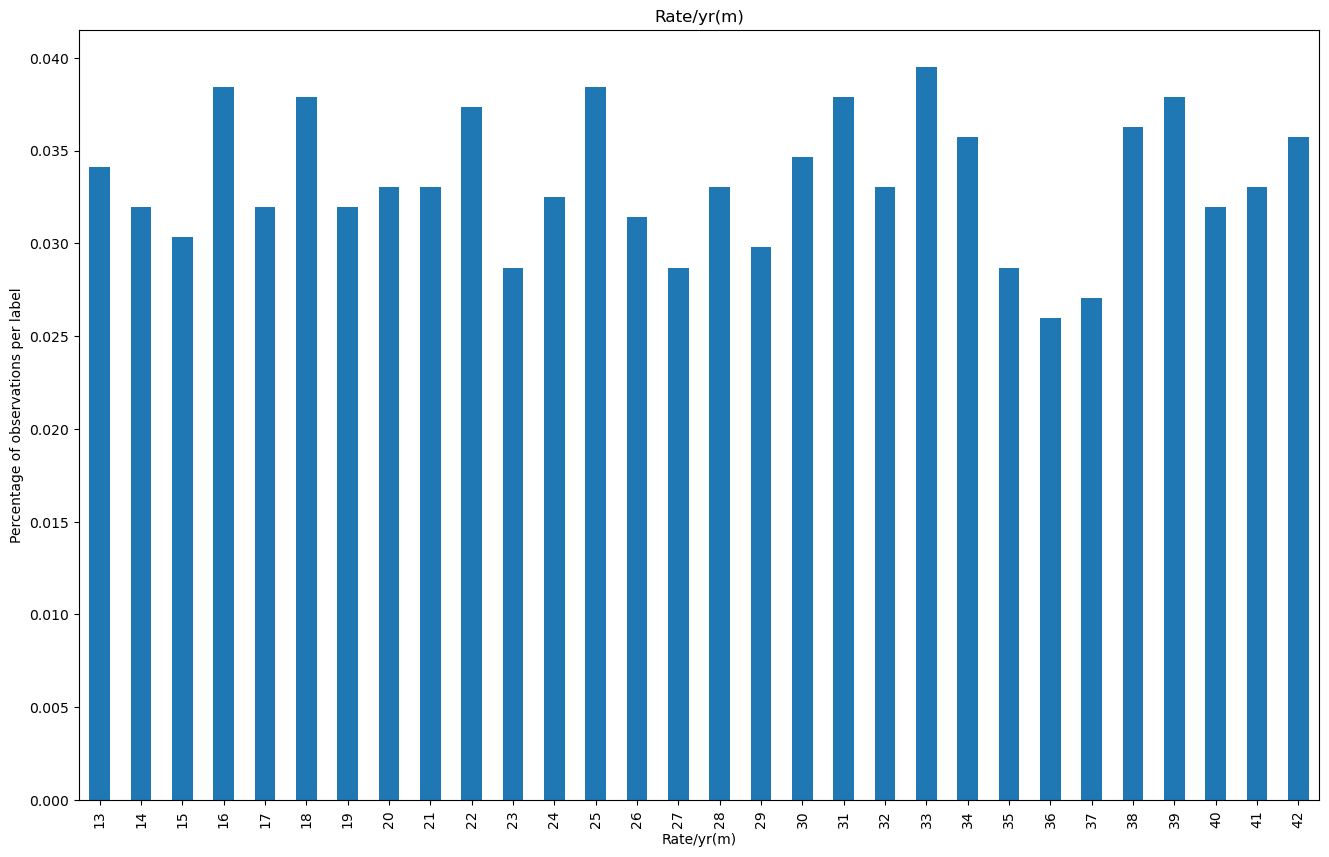

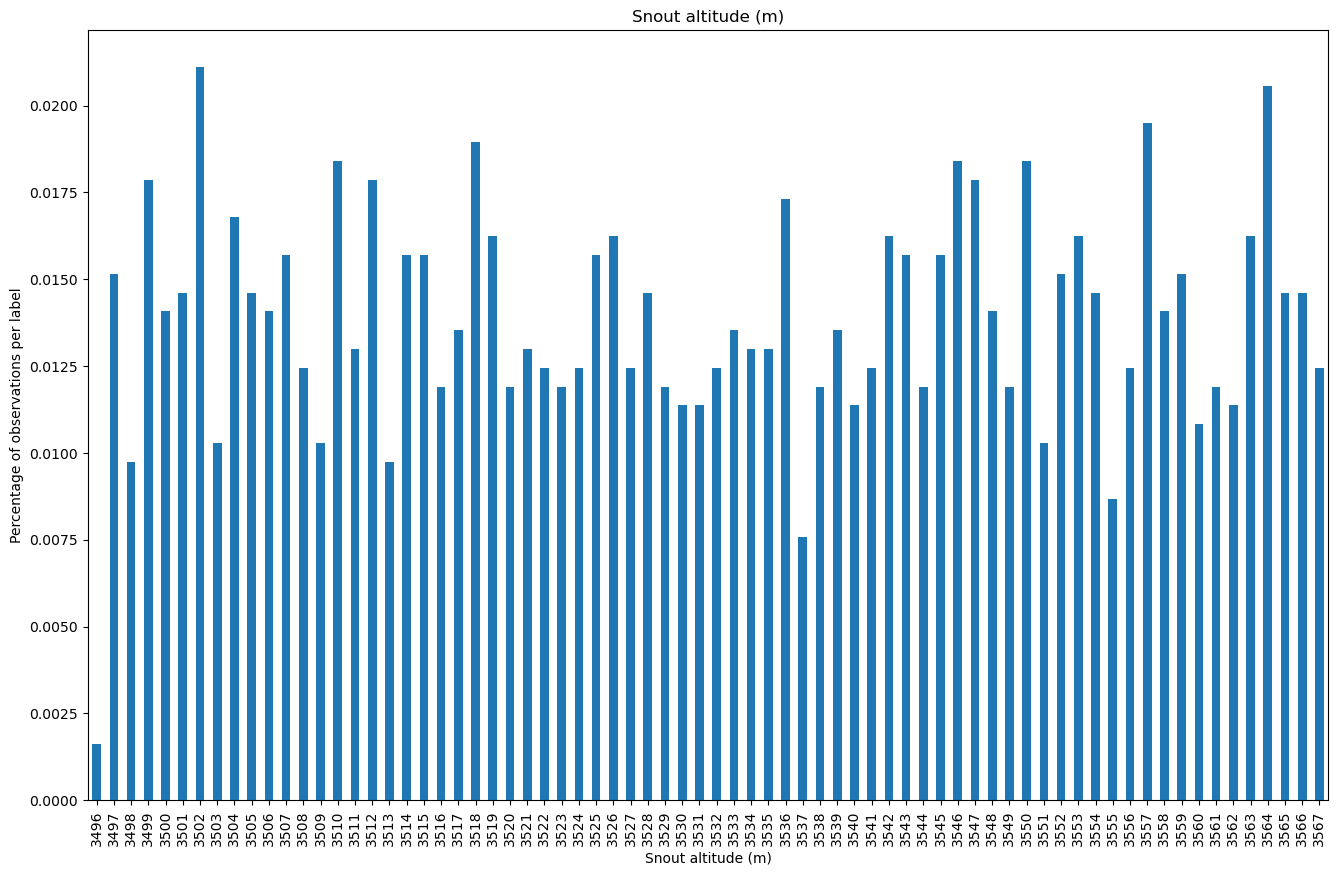

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()